# Humidity Sensor Lab
### 9.25.18   |   Jonathan Kelley   |  ISIM

Our goal is to measure the relative humidity of the air using a cellulose-based variable capacitor device.

To verify that our humidity data is being accurately collected by the circuit, we constructed a calibration curve using data from 5 different capacitors.


This circuit is given below with an exmaple 220 pF capacitor:

![Tranducer](capacitorcircuit.png)

This circuit is only slightly different than the last circuit -- the actual values of the resistor and capacitor are different, but the structure and performance are very similar:

![Last Tranducer](oldcapacitorcircuit.png)

With a 10 kHz square wave with a 500 mV amplitude and 500 mV offset, we get a response curve that looks like:

![Voltage](voltage.png)

### RMS Data for Calibration

We collected the RMS data for our circuit with various capacitances:

- 220pF : 138.68 mV
- 180pF : 123.10 mV
- 150pF : 112.85 mV
- 120pF : 97.86 mV
- 100pF : 88.45 mV

### Analytical vs Experimental RMS


The book suggest that the measured voltage over the resistor will be equal to:

$$ V_p = e^{\frac{-t}{\tau}} $$

The total change in potential is given by
$$ \int_{0}^{100\mu s}e^{\frac{-t}{RC}} dt $$

For the 220pF and 10K combination, we would expect this to be equal to about 2.2e-6 Vs. 

Averaged out over 100 µs, we would expect an average voltage to be about 0.022 V with an RMS of about 148 mV. Our experimental data follows the analytical solution almost exactly, however slightly offset likely due to manufacturing tolerances of the resistor.



In [2]:
import warnings; warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
import string

In [3]:
data = np.array([[220, 138.68], # pf, mv 
                 [180, 123.10],
                 [150, 112.85],
                 [120, 97.86],
                 [100, 88.45]])

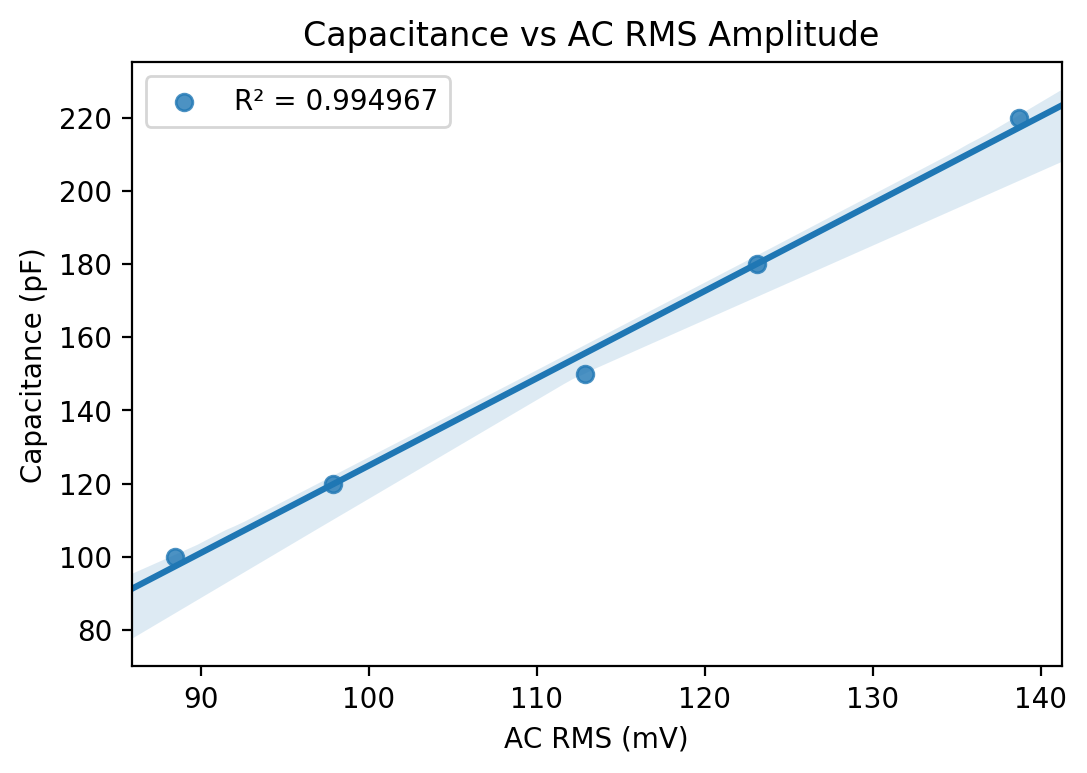

In [4]:
plt.figure(dpi = 200)
capacitances = data[:,0]
ACRMS = data[:,1]

slope, intercept, r_value, p_value, std_err = stats.linregress(ACRMS, capacitances)

sb.regplot(ACRMS, capacitances, label="R² = %f" % (r_value**2.0))


plt.title("Capacitance vs AC RMS Amplitude ")
plt.xlabel("AC RMS (mV)")
plt.ylabel("Capacitance (pF)")
plt.legend()

In [5]:
def RH(C):
    x = C/180
    return -3.4656e3 * x**3.0 + 1.0732e4*x**2.0 - 1.0457e4 * x + 3.2459e3

Text(182.715,28.1423,'Measured Room\nHumidity (61%)\n')

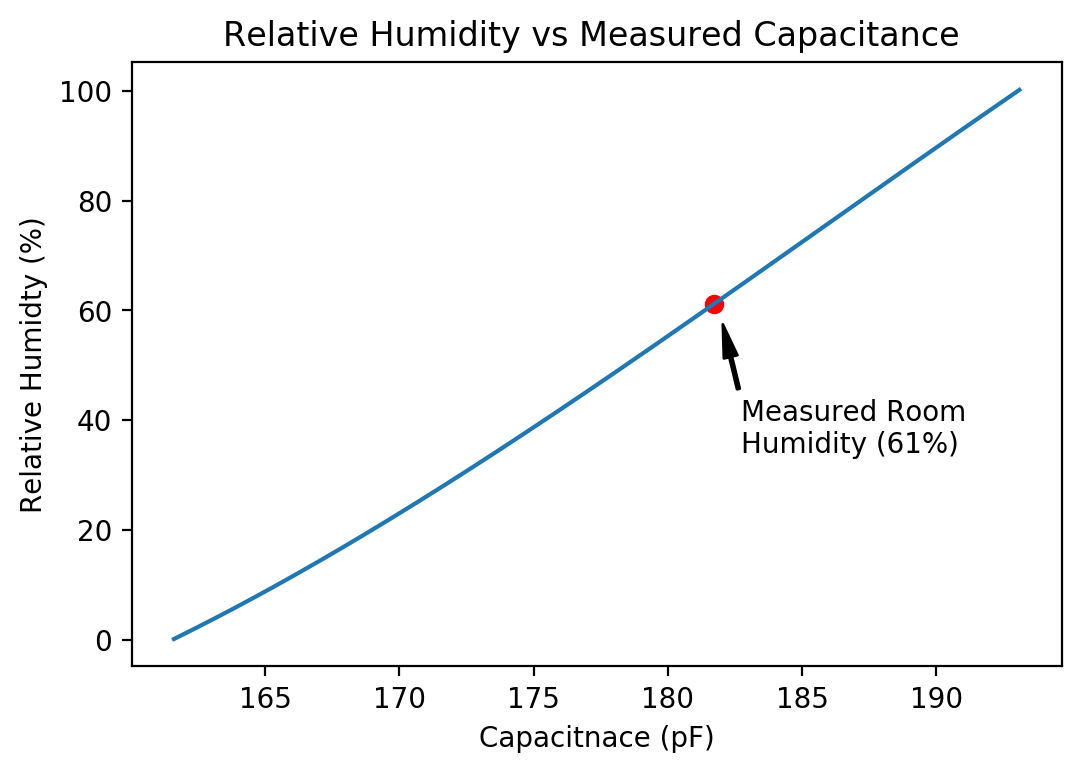

In [6]:
xs = np.linspace(161.6, 193.1, 500)
ys = RH(xs)

measured_humidty_RMS = 123.79 #mV
humidty_capacitance = slope * measured_humidty_RMS + intercept
humidty_percent = RH(humidty_capacitance)


plt.figure(dpi = 200)
plt.plot(xs, ys)
plt.title("Relative Humidity vs Measured Capacitance ")
plt.xlabel("Capacitnace (pF)")
plt.ylabel("Relative Humidty (%)")


plt.scatter([humidty_capacitance],[humidty_percent], color = "red")


# Show Room Temperature
plt.gca().annotate(("Measured Room\nHumidity ({0:.0f}%)\n".format(humidty_percent)), xy=(humidty_capacitance+.3, humidty_percent-3), xytext=(humidty_capacitance+1, humidty_percent-33),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5)
            )

The measured humidity of 61% was taken during a non-rainy, windy, indoor environment and matches wunderground.com historical data.